In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import trustworthiness
from scipy.spatial import distance_matrix
from ecopy import pcoa
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Handy functions

In [72]:
def project_into_space(X_embedded, labels, class_names=None):
    """Function draws data embedded into 2-dimensional vector space"""
    
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(len(set(labels))):
        digit_indeces = (labels == i)
        dim1 = X_embedded[digit_indeces, 0]
        dim2 = X_embedded[digit_indeces, 1]
        if class_names != None:
            plot.scatter(dim1, dim2, label = class_names[i])
        else:
            plot.scatter(dim1, dim2, label = i)
    
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()

In [73]:
# *args are arguments of function named func
def measure_time(func, *args):
    """Function measures program's time execution"""
    
    start_time = time.time()
    prog = func(*args)
    end_time = time.time()
    
    return end_time - start_time

### Constants

In [74]:
TIME_DICT = {
    'umap_time' : None,
    'humap_time' : None,
    'trimap_time': None,
    'pacmap_time' : None,
    'isomap_time' : None,
    'ivhd_time' : None
}

In [75]:
METRIC_DICT = {
    'umap_metric' : None,
    'humap_metric' : None,
    'trimap_time': None,
    'pacmap_metric' : None,
    'isomap_metric' : None,
    'ivhd_metric' : None
}

### Data preparation

In [76]:
df = pd.read_csv("./fmnist.csv", header = None)

In [77]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


In [79]:
SAMPLE_SIZE = 30000
SAMPLE_SIZE_TINY = 100

full = np.array(df, dtype='float32')

X_full = full[:, :-1]
y_full = full[:,-1].astype('int')

X_small = X_full[:SAMPLE_SIZE]
y_small = y_full[:SAMPLE_SIZE]

X_tiny = X_full[:SAMPLE_SIZE_TINY]
y_tiny = y_full[:SAMPLE_SIZE_TINY]

df_full = pd.DataFrame(X_full)
# df_full.to_csv('./fmnist_no_labels.csv', header = False, index = False)
df_labels = pd.DataFrame(y_full)
# df_labels.to_csv('./fmnist_labels.csv', header = False, index = False)

# help(df_full.to_csv)

In [80]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

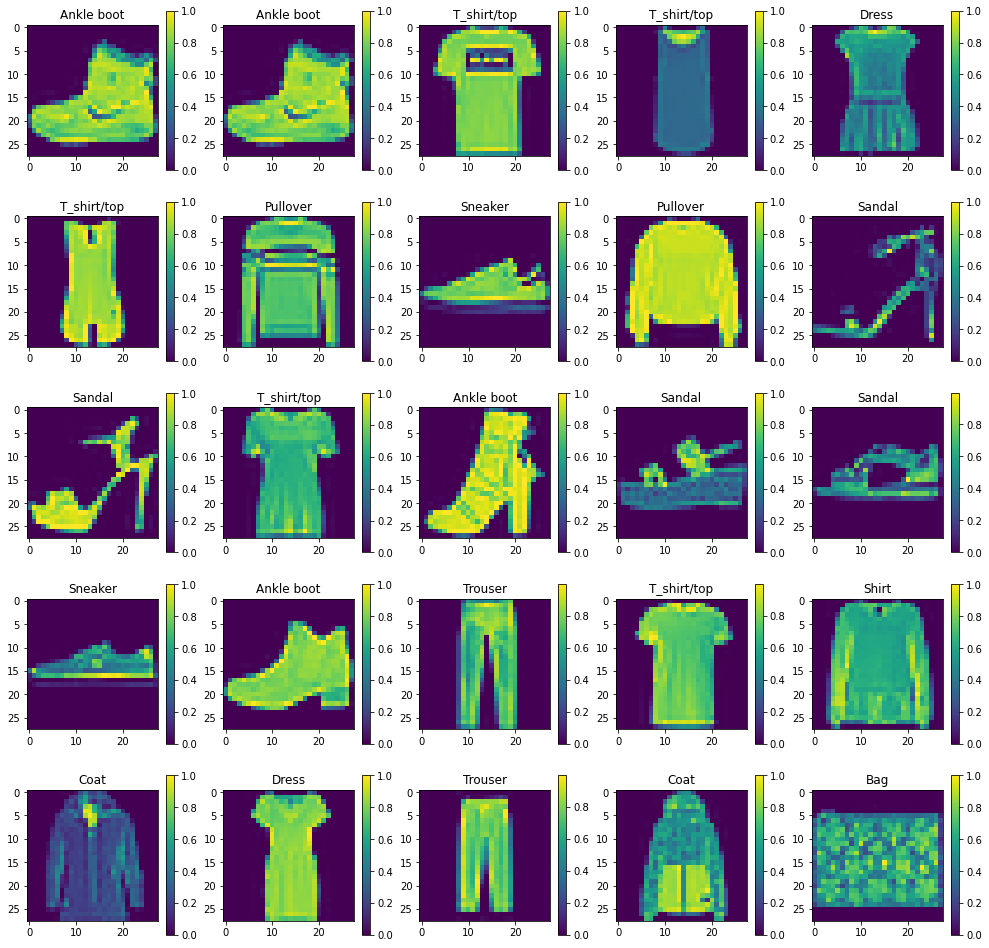

In [10]:
plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_full[i].reshape((28,28)))
    plt.colorbar()
    label_index = int(y_full[i])
    plt.title(class_names[label_index])
plt.show()

### UMAP

In [81]:
import umap.umap_ as umap

c:\users\marti\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
umap_fmnist = umap.UMAP(random_state=42)

umap_start_time = time.time()
X_umap_fmnist_embedded = umap_fmnist.fit_transform(X_tiny)
umap_end_time = time.time()

TIME_DICT['umap_time'] = umap_end_time - umap_start_time

In [83]:
np.savetxt("umap_embedded_full.txt", X_umap_fmnist_embedded)

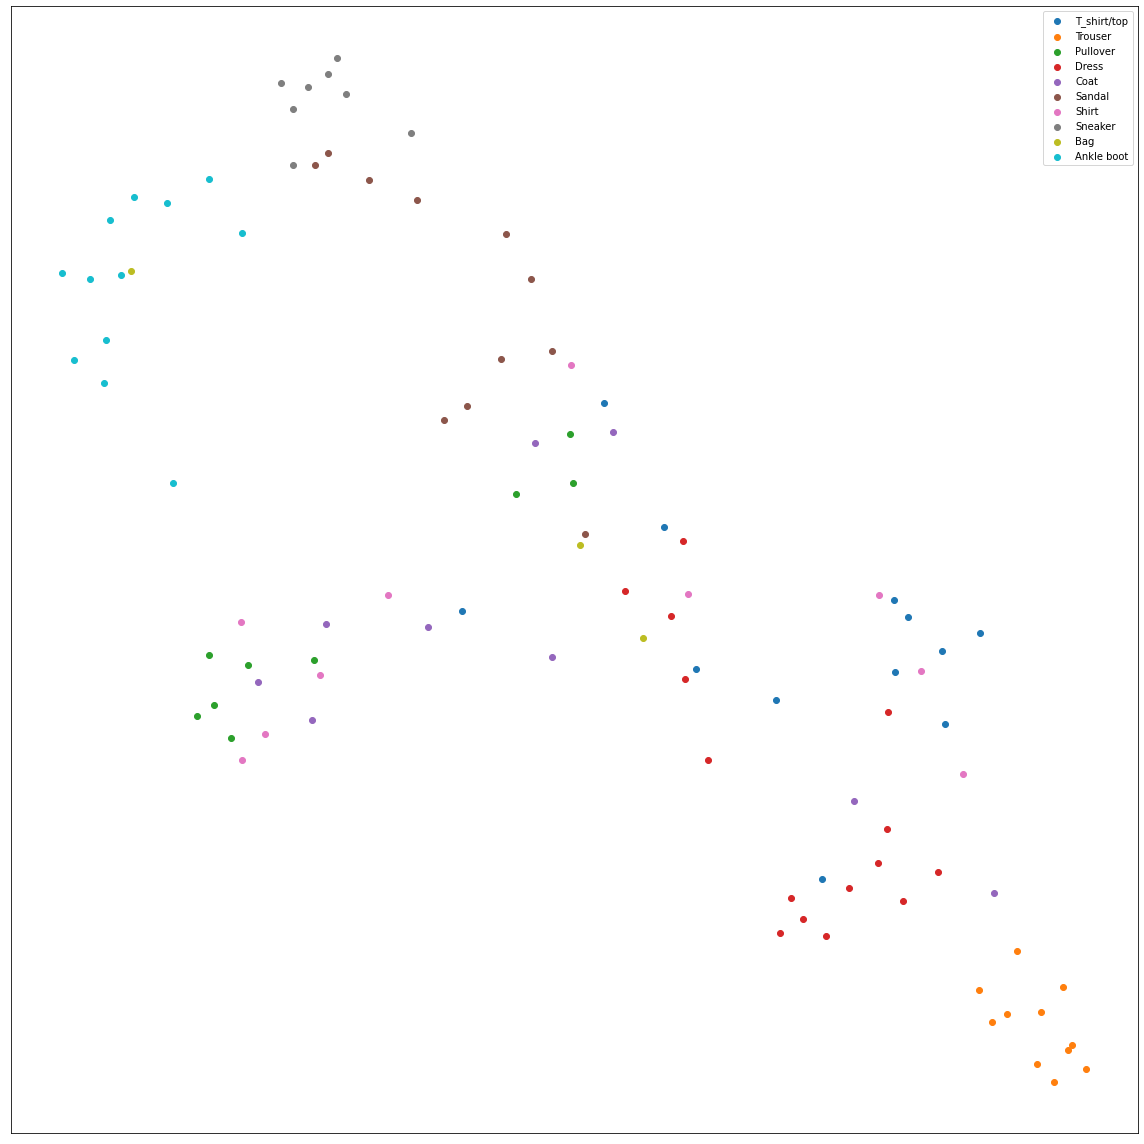

In [84]:
project_into_space(X_umap_fmnist_embedded, y_tiny, class_names)

### HUMAP

In [10]:
import humap

In [11]:
# List to store evaluation time for different hierarchies
TIME_DICT['humap_time'] = []

In [ ]:
hUmap = humap.HUMAP(n_neighbors=1)

humap_start_time = time.time()

hUmap.fit(X_tiny, y_tiny)
humap_embedding_l1 = hUmap.transform(1)

humap_end_time = time.time()

TIME_DICT['humap_time'].append(humap_end_time - humap_start_time)
y_l1 = hUmap.labels(1)

In [ ]:
np.savetxt("humapl1_embedded_small.txt", humap_embedding_l1)

In [ ]:
project_into_space(humap_embedding_l1, y_l1, class_names)

In [ ]:
hUmap = humap.HUMAP()

humap_start_time = time.time()

hUmap.fit(X_tiny, y_tiny)
humap_embedding_l2 = hUmap.transform(2)

humap_end_time = time.time()

TIME_DICT['humap_time'].append(humap_end_time - humap_start_time)
y_l2 = hUmap.labels(2)

In [ ]:
np.savetxt("humapl2_embedded_small.txt", humap_embedding_l2)

In [ ]:
project_into_space(humap_embedding_l2, y_l2, class_names)

### triMAP

In [85]:
import trimap as trmp

In [86]:
# List to store evaluation time for different metrics
TIME_DICT['trimap_time'] = []

In [87]:
trimap_start_time = time.time()
trimap_embedding_euclidean = trmp.TRIMAP(distance = 'euclidean').fit_transform(X_tiny)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

In [88]:
np.savetxt("trimap_embedded_small_eucl.txt", trimap_embedding_euclidean)

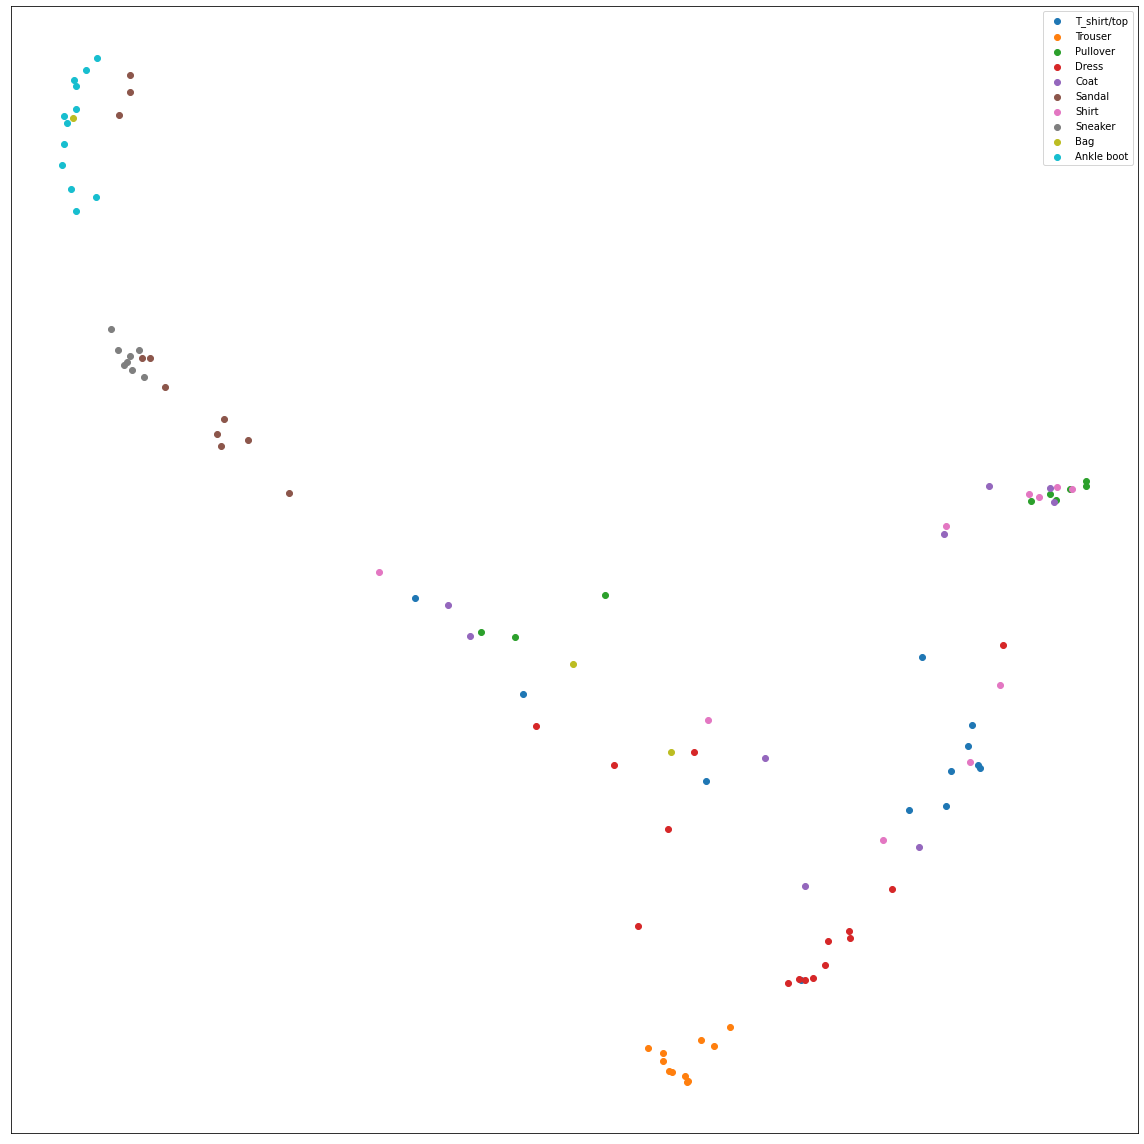

In [89]:
project_into_space(trimap_embedding_euclidean, y_tiny, class_names)

In [90]:
trimap_start_time = time.time()
trimap_embedding_manhattan = trmp.TRIMAP(distance = 'manhattan').fit_transform(X_tiny)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

In [91]:
np.savetxt("trimap_embedded_small_manh.txt", trimap_embedding_manhattan)

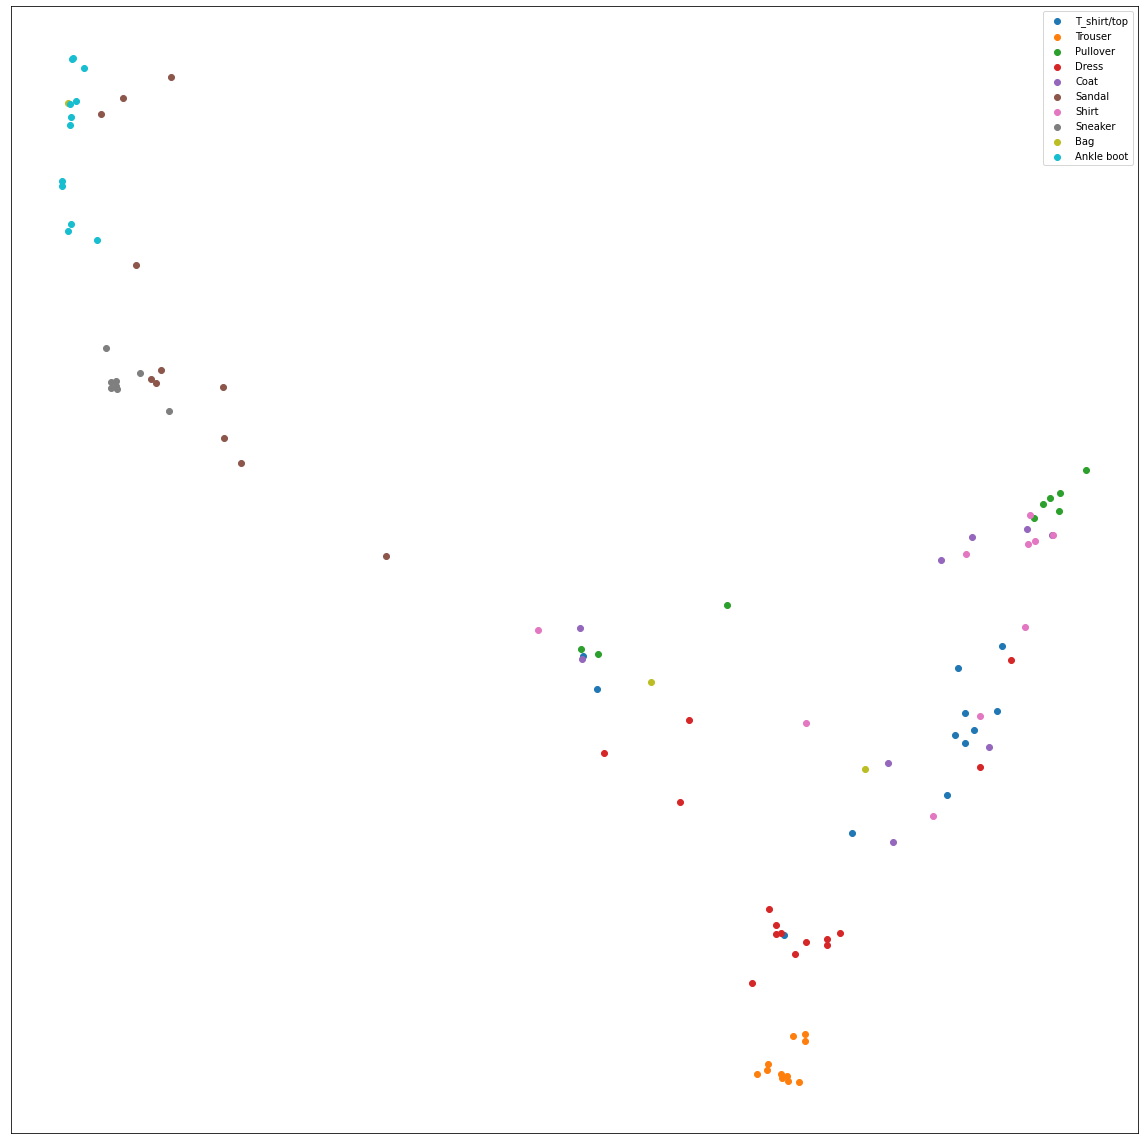

In [92]:
project_into_space(trimap_embedding_manhattan, y_tiny, class_names)

In [93]:
trimap_start_time = time.time()
trimap_embedding_cosine = trmp.TRIMAP(distance = 'cosine').fit_transform(X_tiny)
trimap_end_time = time.time()

TIME_DICT['trimap_time'].append(trimap_end_time - trimap_start_time)

In [94]:
np.savetxt("trimap_embedded_small_cos.txt", trimap_embedding_cosine)

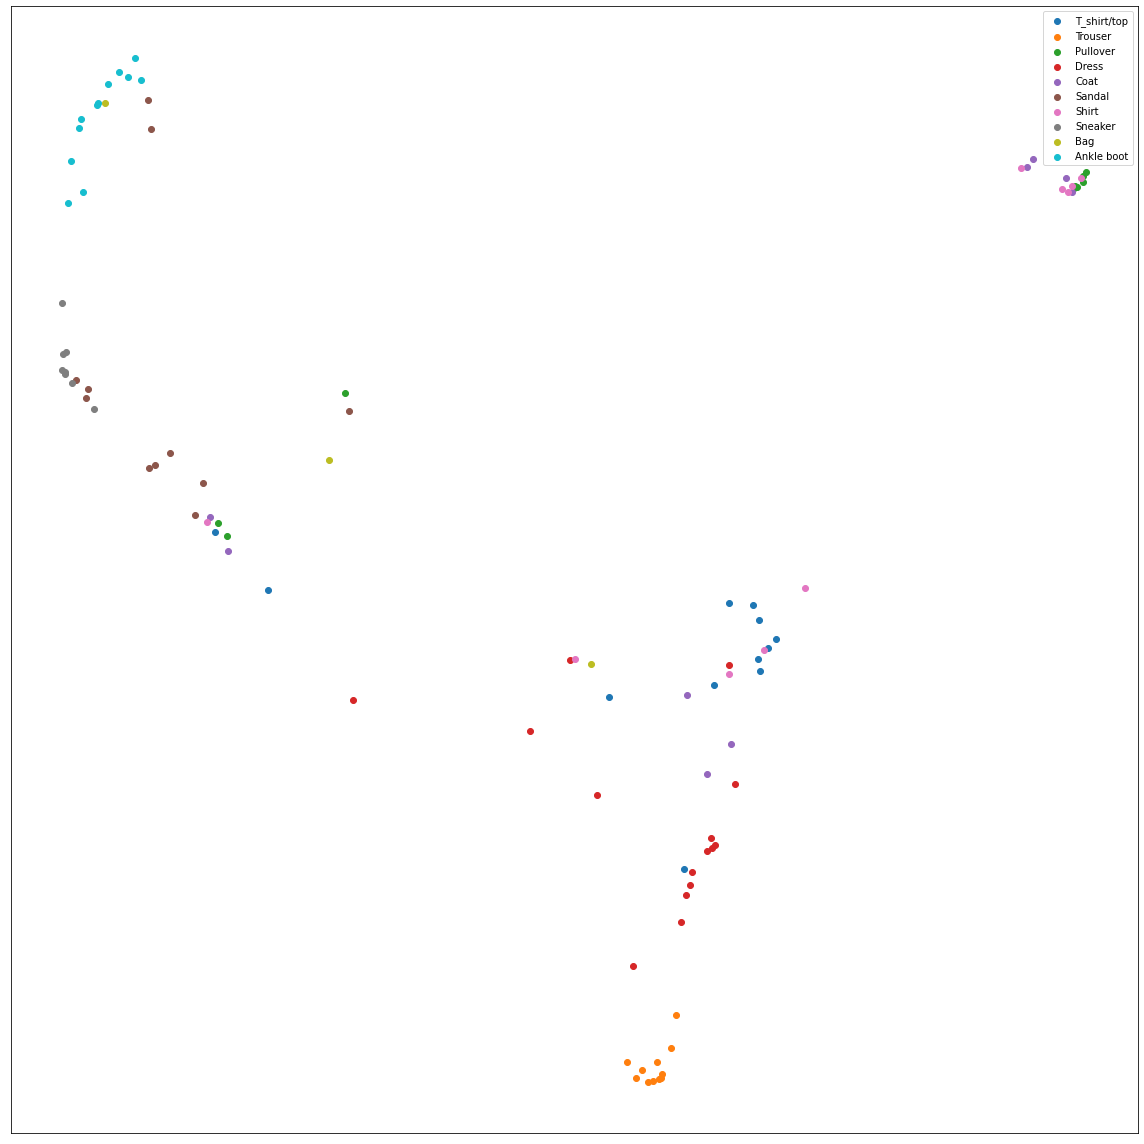

In [95]:
project_into_space(trimap_embedding_cosine, y_tiny, class_names)

### PacMAP

In [96]:
import pacmap as pcmp

In [97]:
pacmap_start_time = time.time()
pacmap_embedding = pcmp.PaCMAP().fit_transform(X_tiny)
pacmap_end_time = time.time()

TIME_DICT['pacmap_time'] = pacmap_end_time - pacmap_start_time

In [98]:
np.savetxt("pacmap_embedded_small.txt", pacmap_embedding)

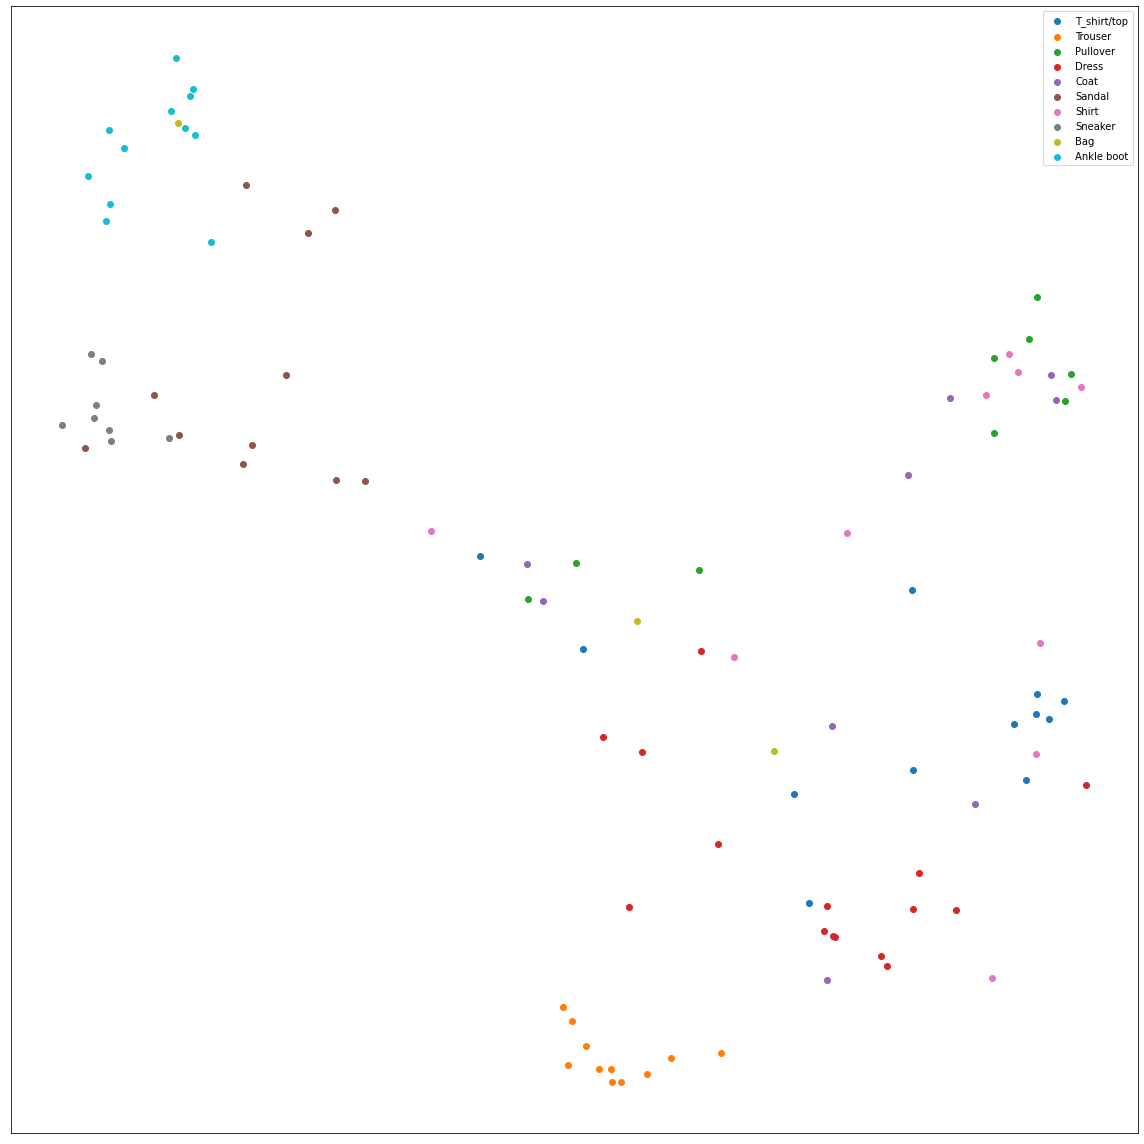

In [99]:
project_into_space(pacmap_embedding, y_tiny, class_names)

### Isomap

In [100]:
from sklearn.manifold import Isomap

In [101]:
# List to store evaluation time for different metrics
TIME_DICT['isomap_time'] = []

In [102]:
isomap_start_time = time.time()
isomap_embedding_minkowski = Isomap(n_components = 2, p = 1).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

In [103]:
np.savetxt("isomap_embedded_small_mink.txt", isomap_embedding_minkowski)

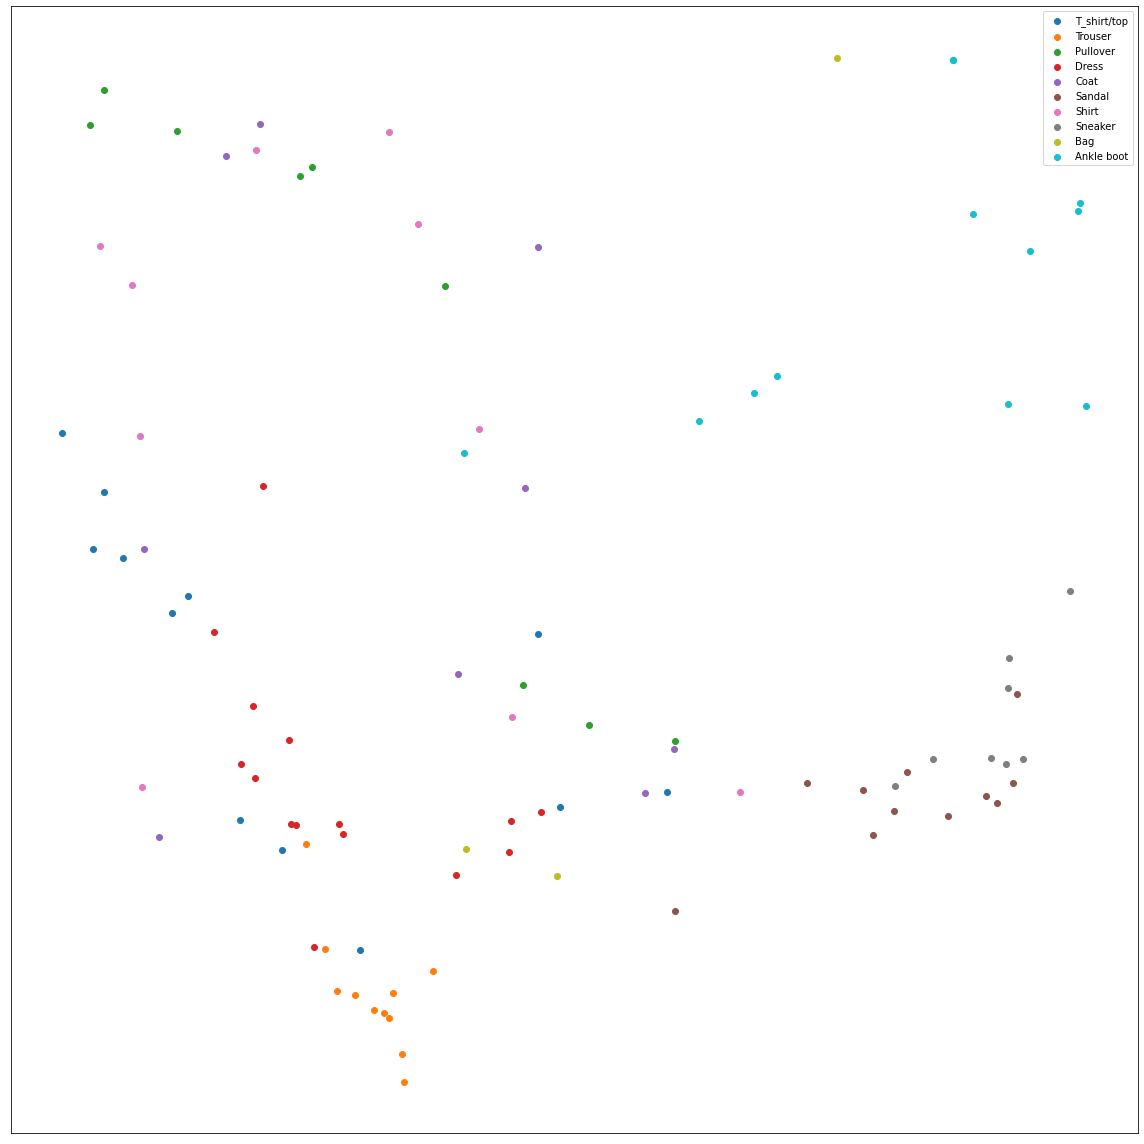

In [104]:
project_into_space(isomap_embedding_minkowski, y_tiny, class_names)

In [105]:
isomap_start_time = time.time()
isomap_embedding_euclidean = Isomap(n_components = 2, p = 2).fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

In [106]:
np.savetxt("isomap_embedded_small_eucl.txt", isomap_embedding_euclidean)

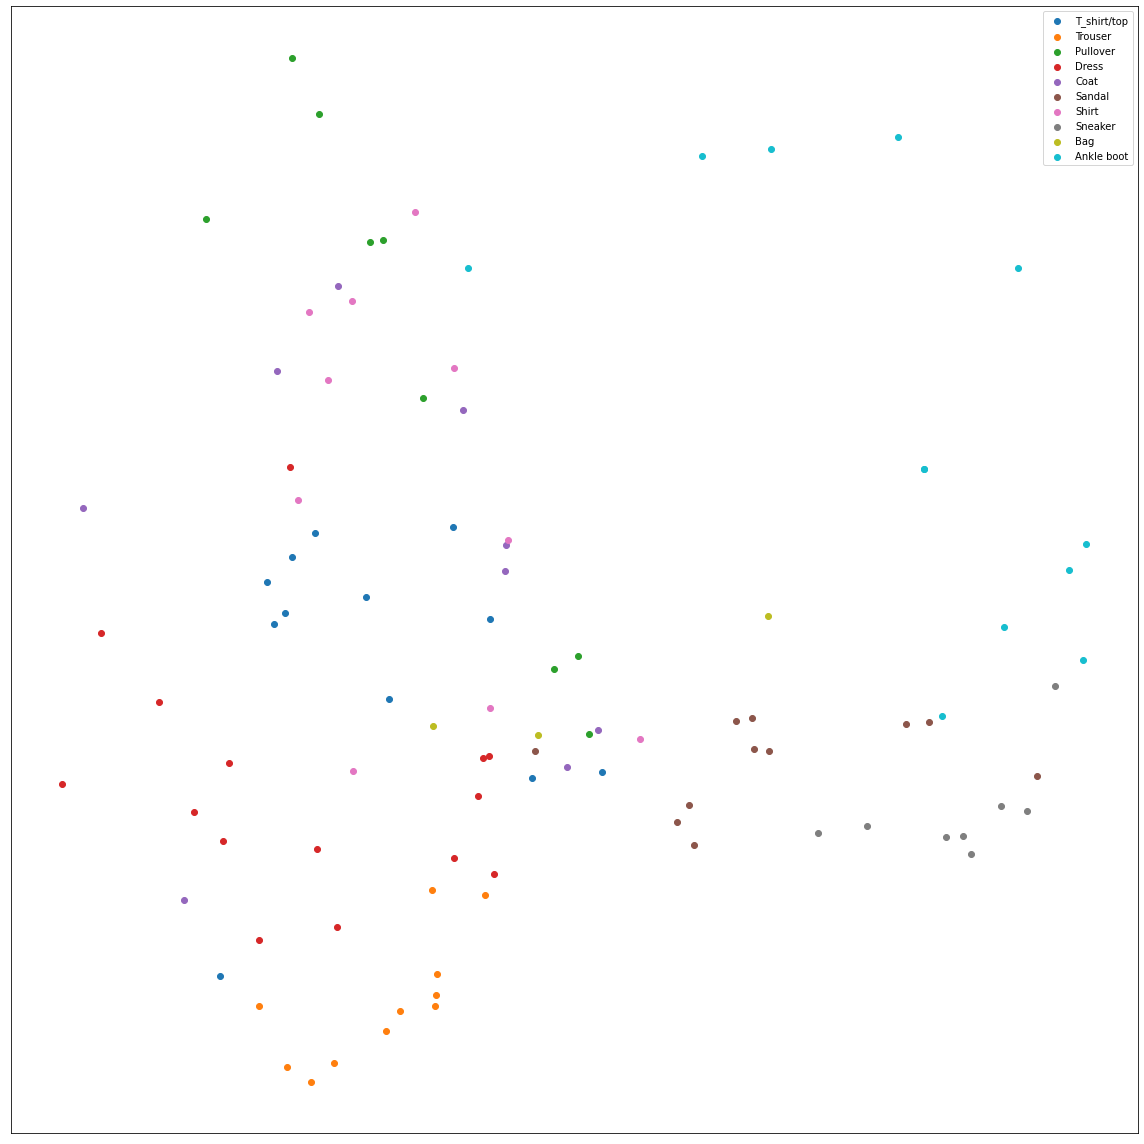

In [107]:
project_into_space(isomap_embedding_euclidean, y_tiny, class_names)

In [108]:
isomap_start_time = time.time()
isomap_embedding_cosine = Isomap(n_components = 2, metric = 'cosine').fit_transform(X_tiny)
isomap_end_time = time.time()

TIME_DICT['isomap_time'].append(isomap_end_time - isomap_start_time)

In [109]:
np.savetxt("isomap_embedded_small_cos.txt", isomap_embedding_cosine)

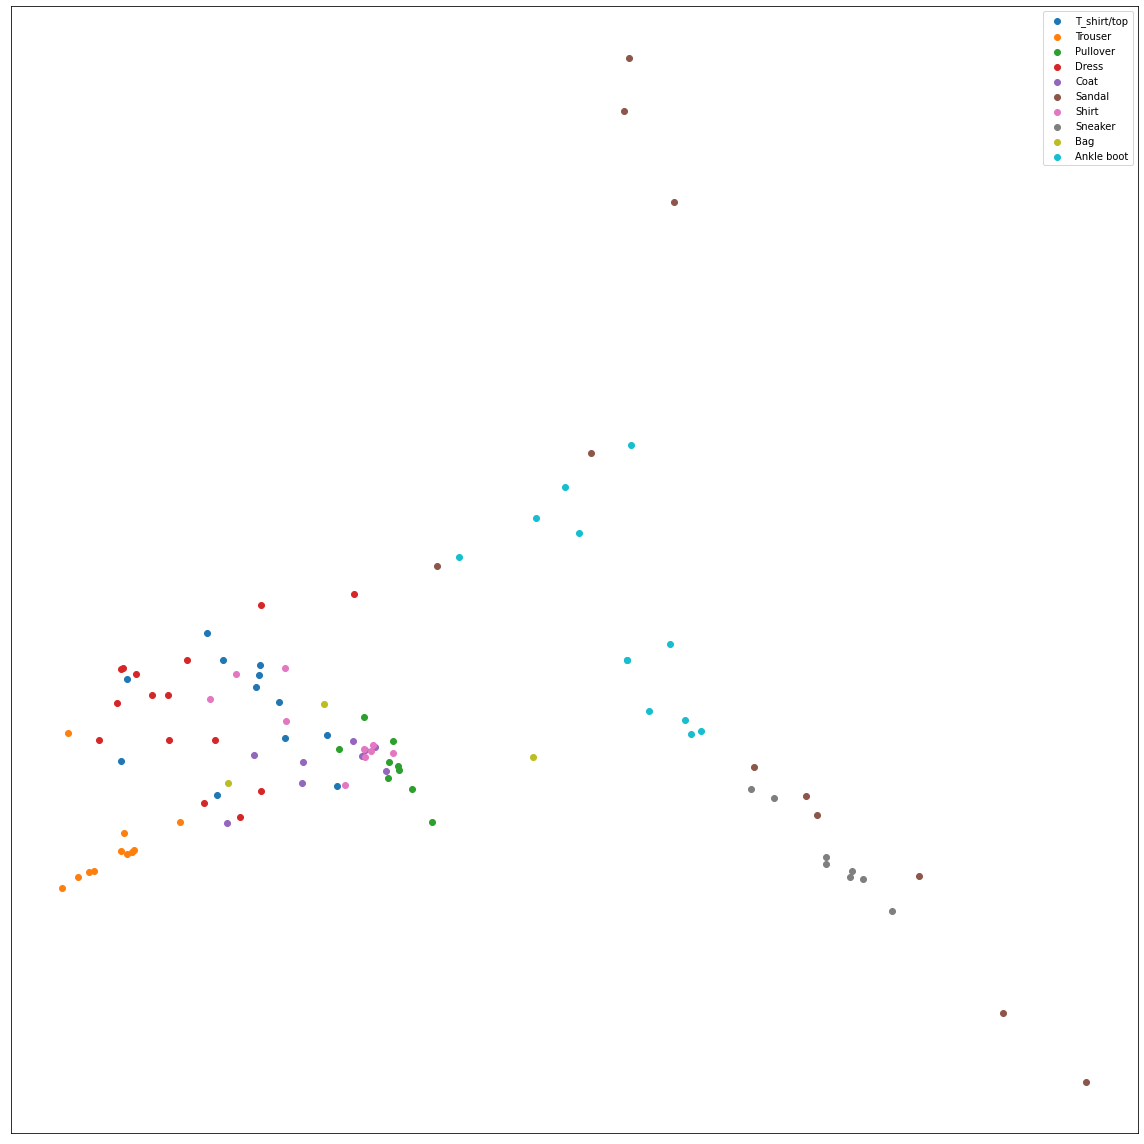

In [110]:
project_into_space(isomap_embedding_cosine, y_tiny, class_names)

In [111]:
TIME_DICT

{'umap_time': 7.491789102554321,
 'humap_time': None,
 'trimap_time': [0.3393421173095703, 0.28383660316467285, 0.302825927734375],
 'pacmap_time': 0.17014694213867188,
 'isomap_time': [0.02698659896850586,
  0.019996166229248047,
  0.015990257263183594],
 'ivhd_time': None}

In [ ]:
import json

with open('time_dict.txt', 'w') as file:
     file.write(json.dumps(TIME_DICT))

## IVHD

In [ ]:
ivhd_data = pd.read_csv('./fmnist_ivhd_euclidean_5_neighbors.txt.txt', header = None)

In [ ]:
ivhd_data = ivhd_data.iloc[:, :3]

In [ ]:
ivhd_data.columns = ['x', 'y', 'label']
ivhd_data.head(10)

In [ ]:
project_into_space(ivhd_data.values[:,:2], ivhd_data.values[:, -1], class_names)

### Comparison

In [ ]:
from scipy.spatial import distance_matrix

# X is a design matrix which belongs to space R^{n x 2}, y is a vector of labels
def calculate_metric(X, y):
    """Function returns a value of metric specified in the exercise"""
    
    df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    df['labels'] = y
    dist_same_class = []
    n_elem_same_class = []
    dist_different_class = []
    n_elem_different_class = []
    y_unique = df['labels'].drop_duplicates()
    
    for label in y_unique:
        points_same_class = df[df['labels'] == label]
        points_different_class = df[df['labels'] != label]
        
        dist_mat_same_class = distance_matrix(points_same_class, points_same_class, p=2)
        dist_mat_different_class = distance_matrix(points_same_class, points_different_class, p=2)

        # Sum over upper triangular of dist_mat matrix, we can do that this way because of this method is effective
        dist_same_class.append((dist_mat_same_class.sum() - np.trace(dist_mat_same_class).sum())/2)
        
        reshaped_dist_mat_different_class = np.reshape(dist_mat_different_class,newshape = (1, -1))
        dist_different_class.append(np.sum(reshaped_dist_mat_different_class))
        
        # Elements in upper triangular distance matrix between points from the same class without counting elements from diagonal
        n_elem_same_class.append(((dist_mat_same_class.shape[0])**2 - dist_mat_same_class.shape[0]) / 2)
        n_elem_different_class.append(len(dist_different_class))
        
    numerator = np.sum(dist_same_class) / np.sum(n_elem_same_class)
    denominator = np.sum(dist_different_class) / np.sum(n_elem_different_class)
    
    # We use -log() function to get positive (in most cases) "bigger" number, without log operation we have very small value
    return -round(np.log(numerator / denominator), 3)

In [ ]:
umap_embedded_metric = calculate_metric(X_umap_fmnist_embedded, y_small)

trimap_embedded_metric = calculate_metric(trimap_embedding, y_small)

# humap_embedded_metric = calculate_metric(humap_embedding, y_small)

pacmap_embedded_metric = calculate_metric(isomap_embedding, y_small)

# isomap_embedded_metric = calculate_metric(pacmap_embedding, y_small)

In [ ]:
METRIC_DICT['umap_metric'] = umap_embedded_metric
METRIC_DICT['trimap_metric'] = pacmap_embedded_metric
METRIC_DICT['pacmap_metric'] = pacmap_embedded_metric
# METRIC_DICT['isomap_metric'] = isomap_embedded_metric

In [ ]:
print(f"""umap_embedded_metric: {umap_embedded_metric},\n
trimap_embedded_metric: {trimap_embedded_metric},\n
pacmap_embedded_metric: {pacmap_embedded_metric}""")

# Metrics for 10 000:

Importing time:

In [25]:
TIME_DICT = {"umap_time": 26.467774868011475, 
             "humap_time": [9.68321967124939, 7.833143949508667], 
             "trimap_time": [22.64442467689514, 22.806508779525757, 22.459447383880615], 
             "pacmap_time": 12.338210344314575, 
             "isomap_time": [1090.7665588855743, 85.49040603637695, 75.82591128349304], 
             "ivhd_time": 'null'}

Importing embeddings:

In [26]:
humapl1_embedded_tiny = np.loadtxt('./calculated/embeddings_tiny/humapl1_embedded_tiny.txt')
humapl2_embedded_tiny = np.loadtxt('./calculated/embeddings_tiny/humapl2_embedded_tiny.txt')
isomap_embedded_tiny_cos = np.loadtxt('./calculated/embeddings_tiny/isomap_embedded_tiny_cos.txt')
isomap_embedded_tiny_eucl = np.loadtxt('./calculated/embeddings_tiny/isomap_embedded_tiny_eucl.txt')
isomap_embedded_tiny_mink = np.loadtxt('./calculated/embeddings_tiny/isomap_embedded_tiny_mink.txt')
pacmap_embedded_tiny = np.loadtxt('./calculated/embeddings_tiny/pacmap_embedded_tiny.txt')
trimap_embedded_tiny_cos = np.loadtxt('./calculated/embeddings_tiny/trimap_embedded_tiny_cos.txt')
trimap_embedded_tiny_eucl = np.loadtxt('./calculated/embeddings_tiny/trimap_embedded_tiny_eucl.txt')
trimap_embedded_tiny_manh = np.loadtxt('./calculated/embeddings_tiny/trimap_embedded_tiny_manh.txt')
umap_embedded_tiny = np.loadtxt('./calculated/embeddings_tiny/umap_embedded_tiny.txt')

Below newly calculated embeddings:

In [112]:
isomap_embedded_tiny_cos = isomap_embedding_cosine
isomap_embedded_tiny_eucl = isomap_embedding_euclidean
isomap_embedded_tiny_mink = isomap_embedding_minkowski
pacmap_embedded_tiny = pacmap_embedding
trimap_embedded_tiny_cos = trimap_embedding_cosine
trimap_embedded_tiny_eucl = trimap_embedding_euclidean
trimap_embedded_tiny_manh = trimap_embedding_manhattan
umap_embedded_tiny = X_umap_fmnist_embedded

Calculating distances:

In [113]:
dist_mx_X_tiny = distance_matrix(X_tiny, X_tiny)
np.savetxt("dist_mx_X_tiny.txt", dist_mx_X_tiny)

In [114]:
dist_mx_X_tiny.shape

(100, 100)

In [ ]:
# dist_mx_humapl1_tiny = distance_matrix(humapl1_embedded_tiny, humapl1_embedded_tiny)
# np.savetxt("dist_mx_humapl1_tiny.txt", dist_mx_humapl1_tiny)

In [ ]:
# dist_mx_humapl2_tiny = distance_matrix(humapl2_embedded_tiny, humapl2_embedded_tiny)
# np.savetxt("dist_mx_humapl2_tiny.txt", dist_mx_humapl2_tiny)

In [115]:
dist_mx_isomap_tiny_cos = distance_matrix(isomap_embedded_tiny_cos, isomap_embedded_tiny_cos)
np.savetxt("dist_mx_isomap_tiny_cos.txt", dist_mx_isomap_tiny_cos)

In [116]:
dist_mx_isomap_tiny_eucl = distance_matrix(isomap_embedded_tiny_eucl, isomap_embedded_tiny_eucl)
np.savetxt("dist_mx_isomap_tiny_eucl.txt", dist_mx_isomap_tiny_eucl)

In [117]:
dist_mx_isomap_tiny_mink = distance_matrix(isomap_embedded_tiny_mink, isomap_embedded_tiny_mink)
np.savetxt("dist_mx_isomap_tiny_mink.txt", dist_mx_isomap_tiny_mink)

In [118]:
dist_mx_pacmap_tiny = distance_matrix(pacmap_embedded_tiny, pacmap_embedded_tiny)
np.savetxt("dist_mx_pacmap_tiny.txt", dist_mx_pacmap_tiny)

In [119]:
dist_mx_trimap_tiny_cos = distance_matrix(trimap_embedded_tiny_cos, trimap_embedded_tiny_cos)
np.savetxt("dist_mx_trimap_tiny_cos.txt", dist_mx_trimap_tiny_cos)

In [120]:
dist_mx_trimap_tiny_eucl = distance_matrix(trimap_embedded_tiny_eucl, trimap_embedded_tiny_eucl)
np.savetxt("dist_mx_trimap_tiny_eucl.txt", dist_mx_trimap_tiny_eucl)

In [121]:
dist_mx_trimap_tiny_manh = distance_matrix(trimap_embedded_tiny_manh, trimap_embedded_tiny_manh)
np.savetxt("dist_mx_trimap_tiny_manh.txt", dist_mx_trimap_tiny_manh)

In [122]:
dist_mx_umap_tiny = distance_matrix(umap_embedded_tiny, umap_embedded_tiny)
np.savetxt("dist_mx_umap_tiny.txt", dist_mx_umap_tiny)

In [123]:
dist_mx_umap_tiny.shape

(100, 100)

### Local Score

In [152]:
import local_score

Calculating d_hd
umap
Calculating d_hd
trimap cosine
Calculating d_hd
trimap euclidean
Calculating d_hd
trimap manhattan
Calculating d_hd
pacmap
Calculating d_hd
isomap cosine
Calculating d_hd
isomap minkowski
Finished.


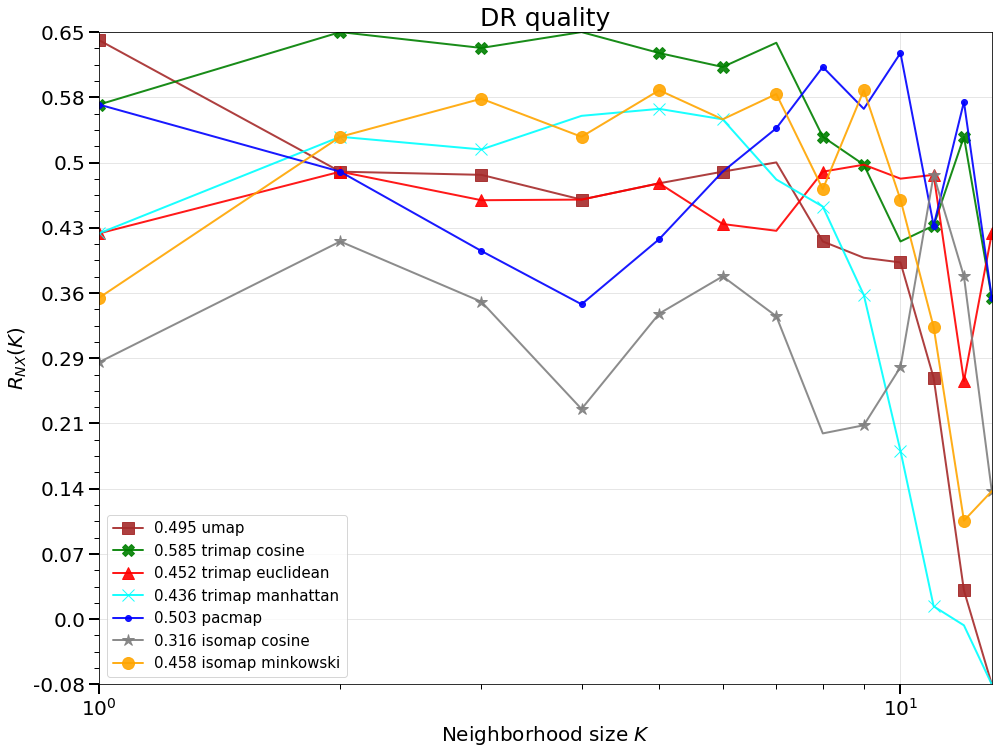

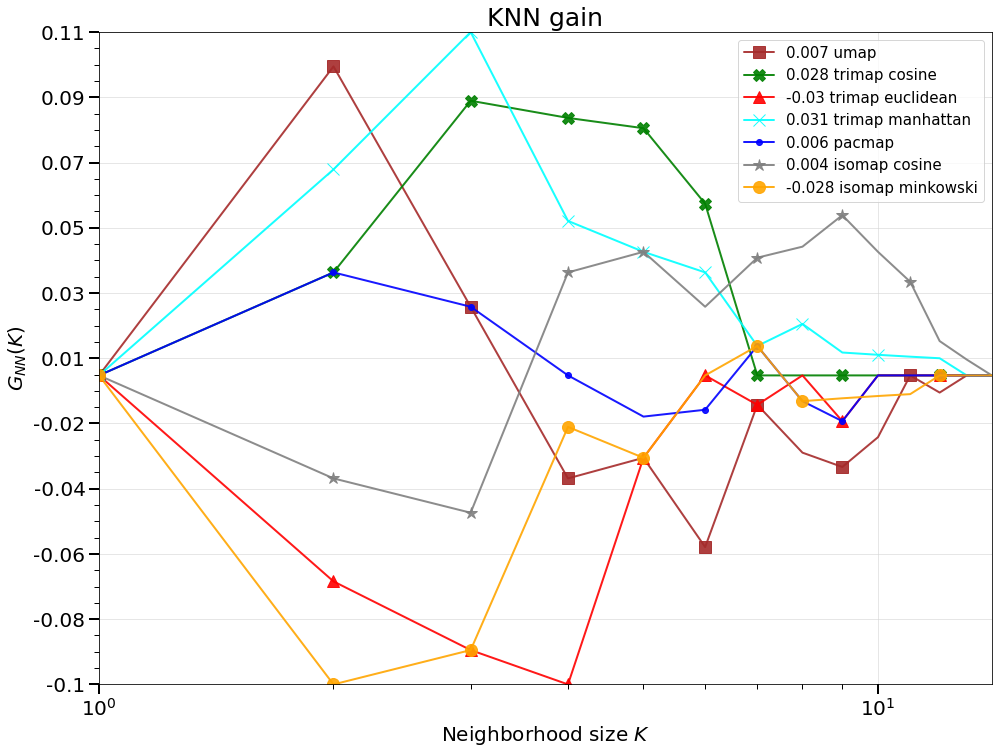

In [154]:
local_metrics = local_score.LocalMetric()

dataset = X_tiny
labels = y_tiny

X_embedded = X_umap_fmnist_embedded
method_name = "umap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

### Humap niestety nie działa (to znaczy działa, ale nie da się porównać)
# X_embedded = humap_embedding_l2
# method_name = "humap"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = trimap_embedding_cosine
method_name = "trimap cosine"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = trimap_embedding_euclidean
method_name = "trimap euclidean"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = trimap_embedding_manhattan
method_name = "trimap manhattan"
local_metrics.calculate_knn_gain_and_dr_quality(X_lds=X_embedded, X_hds=dataset, labels=np.array(labels),method_name=method_name)

X_embedded = pacmap_embedding
method_name = "pacmap"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

X_embedded = isomap_embedding_cosine
method_name = "isomap cosine"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

# X_embedded = isomap_embedding_euclidean
# method_name = "isomap euclidean"

# local_metrics.calculate_knn_gain_and_dr_quality(
#     X_lds=X_embedded,
#     X_hds=dataset,
#     labels=np.array(labels),
#     method_name=method_name
# )

X_embedded = isomap_embedding_minkowski
method_name = "isomap minkowski"

local_metrics.calculate_knn_gain_and_dr_quality(
    X_lds=X_embedded,
    X_hds=dataset,
    labels=np.array(labels),
    method_name=method_name
)

local_metrics.visualize()

### Trustworthiness

In [124]:
def calculate_trust(dataset, labels, distance_matrix, embedding, name):
    datset = dataset
    labels = labels
    dist_mx = distance_matrix
    
    X_embedded = embedding
    method_name = name
    
    trust = trustworthiness(dataset, X_embedded)
    
    print(f"{name} done!")
    
    return trust

In [ ]:
# humapl1_trust_tiny = calculate_trust(X_small, y_small, dist_mx_humapl1_tiny, humapl1_embedded_tiny, 
#                                      "Humap Level 1 tiny")

In [ ]:
# humapl2_trust_tiny = calculate_trust(X_small, y_small, dist_mx_humapl2_tiny, humapl2_embedded_tiny, 
#                                      "Humab Level 2 tiny")

In [126]:
isomap_trust_tiny_cos = calculate_trust(X_tiny, y_small, dist_mx_isomap_tiny_cos, isomap_embedded_tiny_cos, 
                                        "Isomap tiny cosine")

Isomap tiny cosine done!


In [127]:
isomap_trust_tiny_eucl = calculate_trust(X_tiny, y_small, dist_mx_isomap_tiny_eucl, isomap_embedded_tiny_eucl, 
                                         "Isomap tiny euclidean")

Isomap tiny euclidean done!


In [128]:
isomap_trust_tiny_mink = calculate_trust(X_tiny, y_small, dist_mx_isomap_tiny_mink, isomap_embedded_tiny_mink, 
                                         "Isomap tiny minkowski")

Isomap tiny minkowski done!


In [129]:
pacmap_trust_tiny = calculate_trust(X_tiny, y_small, dist_mx_pacmap_tiny, pacmap_embedded_tiny, 
                                    "Pacmap tiny")

Pacmap tiny done!


In [130]:
trimap_trust_tiny_cos = calculate_trust(X_tiny, y_small, dist_mx_trimap_tiny_cos, trimap_embedded_tiny_cos, 
                                        "Trimap tiny cosine")

Trimap tiny cosine done!


In [131]:
trimap_trust_tiny_eucl = calculate_trust(X_tiny, y_small, dist_mx_trimap_tiny_eucl, trimap_embedded_tiny_eucl, 
                                         "Trimap tiny euclidean")

Trimap tiny euclidean done!


In [132]:
trimap_trust_tiny_manh = calculate_trust(X_tiny, y_small, dist_mx_trimap_tiny_manh, trimap_embedded_tiny_manh, 
                                         "Trimap tiny manhattan")

Trimap tiny manhattan done!


In [133]:
umap_trust_tiny = calculate_trust(X_tiny, y_tiny, dist_mx_umap_tiny, umap_embedded_tiny, 
                                  "Umap tiny")

Umap tiny done!


In [135]:
print(umap_trust_tiny, 
      isomap_trust_tiny_cos, 
      isomap_trust_tiny_eucl, 
      isomap_trust_tiny_mink, 
      pacmap_trust_tiny, 
      trimap_trust_tiny_cos, 
      trimap_trust_tiny_eucl, 
      trimap_trust_tiny_manh)

0.9600652173913043 0.8629782608695652 0.9297826086956522 0.9257608695652174 0.9547608695652174 0.9438043478260869 0.9527608695652174 0.9369347826086957


### Shepard

In [136]:
def plot_shepard_diagram(distance_matrix_embedded, distance_matrix_original):
    """Function plots diagram dependecy between distance of two points in output space and between corresponding points
        in input space
    """
    
    try:
        distance_matrix_embedded = np.matrix(distance_matrix_embedded)
        distance_matrix_original = np.matrix(distance_matrix_original)
    except:
        print('Arguments should be able to convert to matrix-like objects')
        return None
    
    # Triangular matrices
    m = distance_matrix_embedded.shape[0]
    r, c = np.triu_indices(m,1)
    
    dist_vec_embedded = np.array(distance_matrix_embedded[r, c])
    dist_vec_original = np.array(distance_matrix_original[r, c])

    dist_vec_embedded_reshaped = np.reshape(dist_vec_embedded, -1)
    dist_vec_original_reshaped = np.reshape(dist_vec_original, -1)
    
    plt.figure(figsize=(16, 16), dpi=80)
    plt.scatter(dist_vec_embedded_reshaped, dist_vec_original_reshaped)
    plt.grid(True)
    plt.show()

In [61]:
# def plot_shepard_diagram(distance_matrix_embedded, distance_matrix_original):
#     """Function plots diagram dependecy between distance of two points in output space and between corresponding points
#         in input space
#     """

#     # Triangular matrices
#     dist_mat_embedded = np.triu(distance_matrix_embedded)
#     dist_mat_original = np.triu(distance_matrix_original)

#     dist_vec_embedded_reshaped = np.reshape(dist_mat_embedded, -1)
#     dist_vec_original_reshaped = np.reshape(dist_mat_original, -1)

#     plt.figure(figsize=(16, 16), dpi=80)
#     plt.scatter(dist_vec_embedded_reshaped, dist_vec_original_reshaped)
#     plt.grid(True)
#     plt.show()

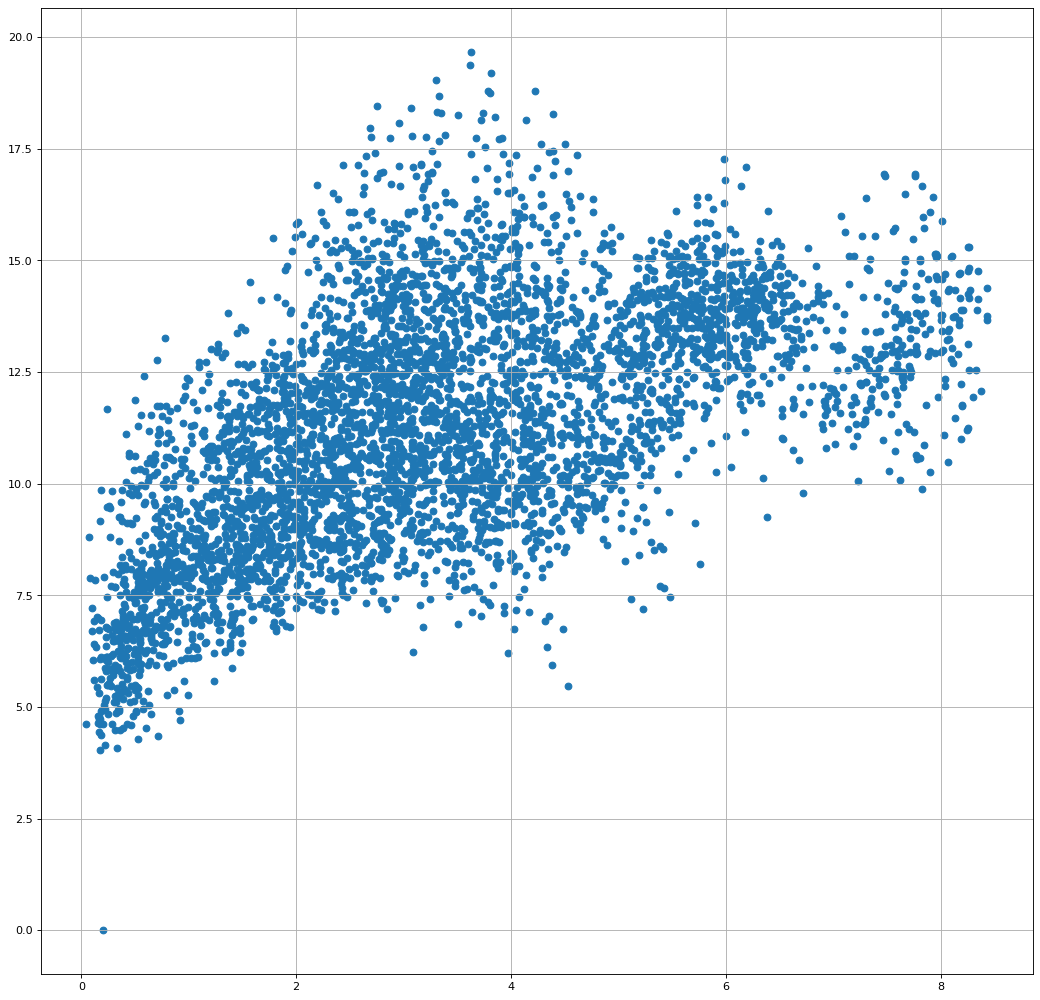

In [137]:
plot_shepard_diagram(dist_mx_umap_tiny, dist_mx_X_tiny)

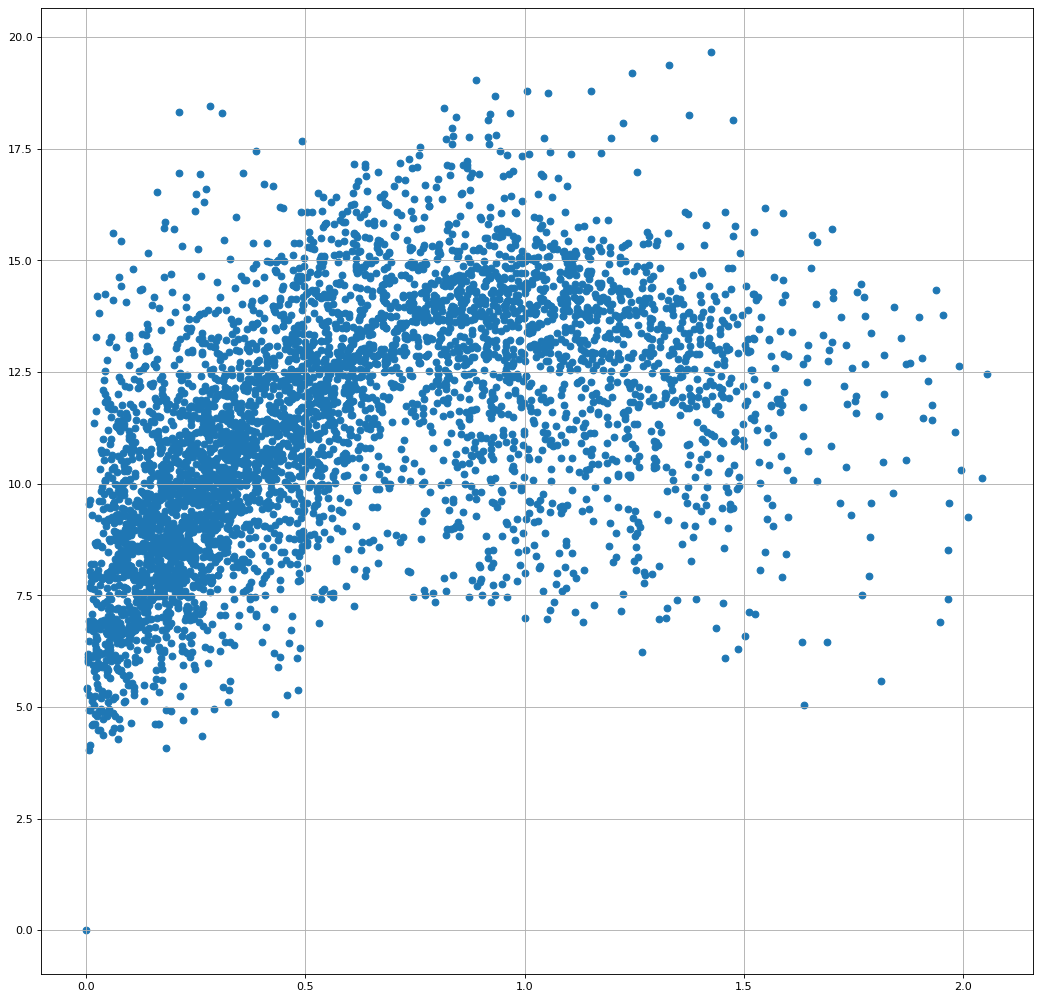

In [138]:
plot_shepard_diagram(dist_mx_isomap_tiny_cos, dist_mx_X_tiny)

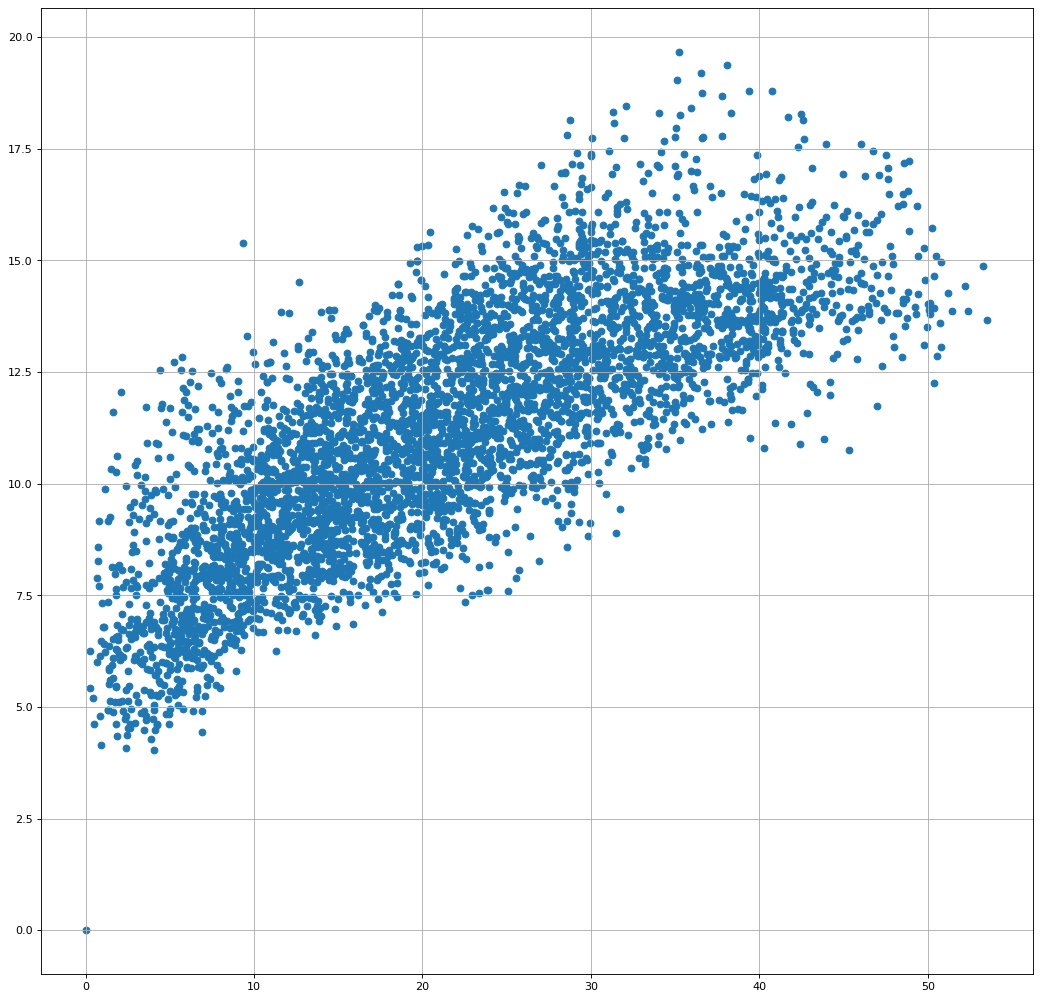

In [139]:
plot_shepard_diagram(dist_mx_isomap_tiny_eucl, dist_mx_X_tiny)

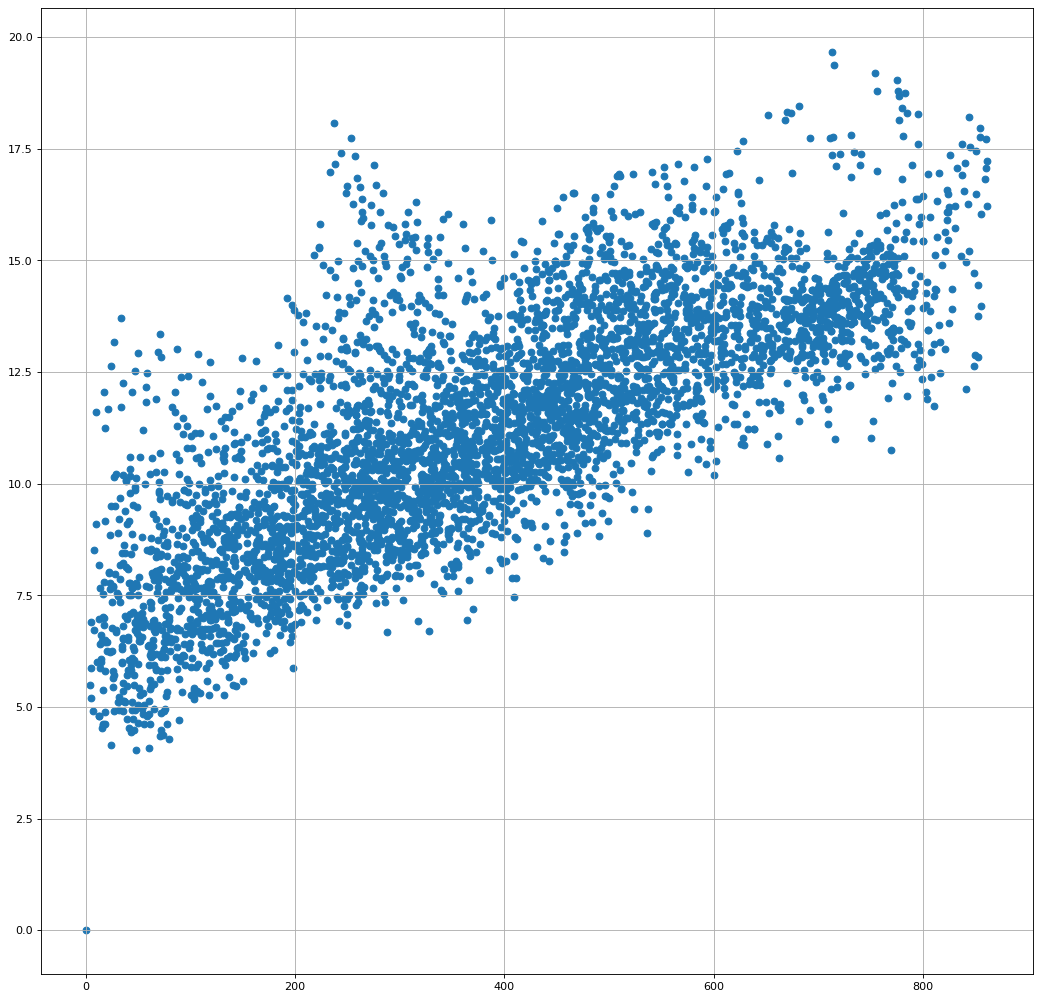

In [140]:
plot_shepard_diagram(dist_mx_isomap_tiny_mink, dist_mx_X_tiny)

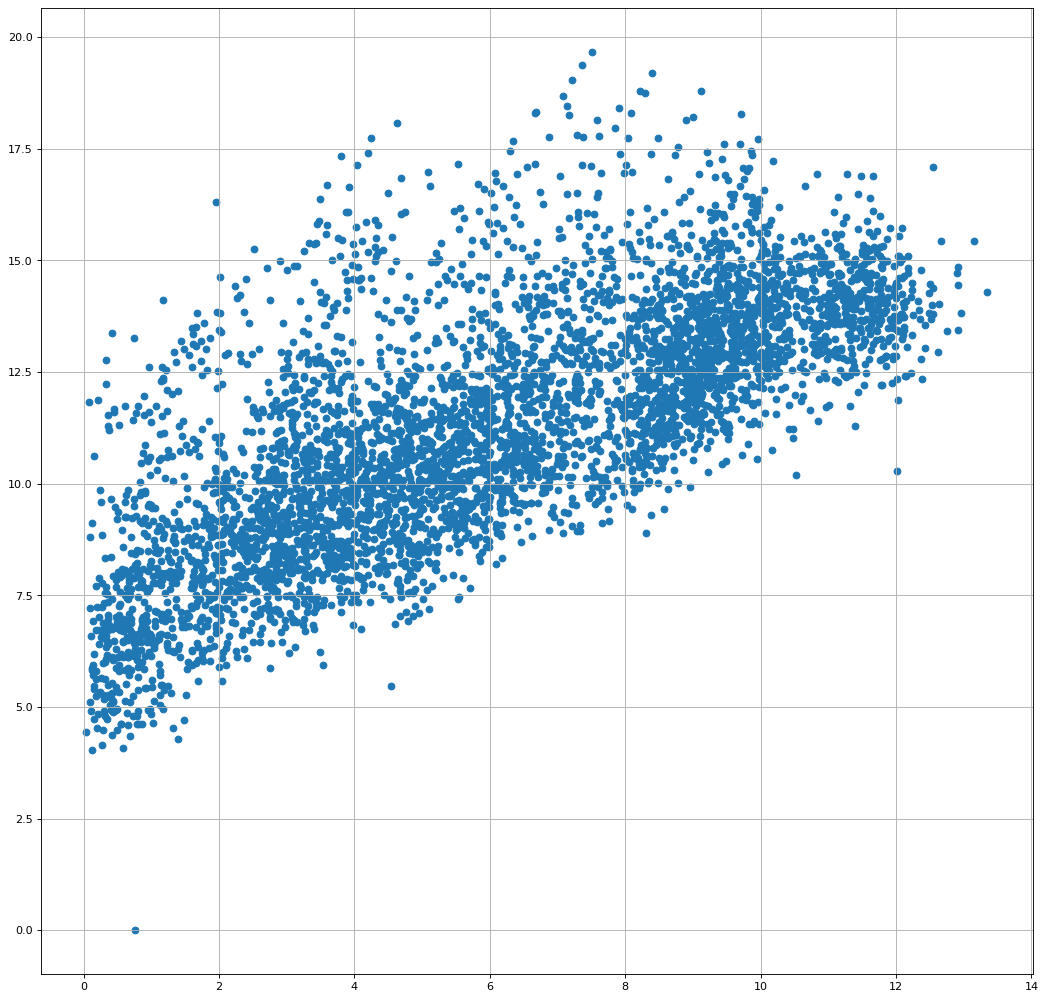

In [141]:
plot_shepard_diagram(dist_mx_pacmap_tiny, dist_mx_X_tiny)

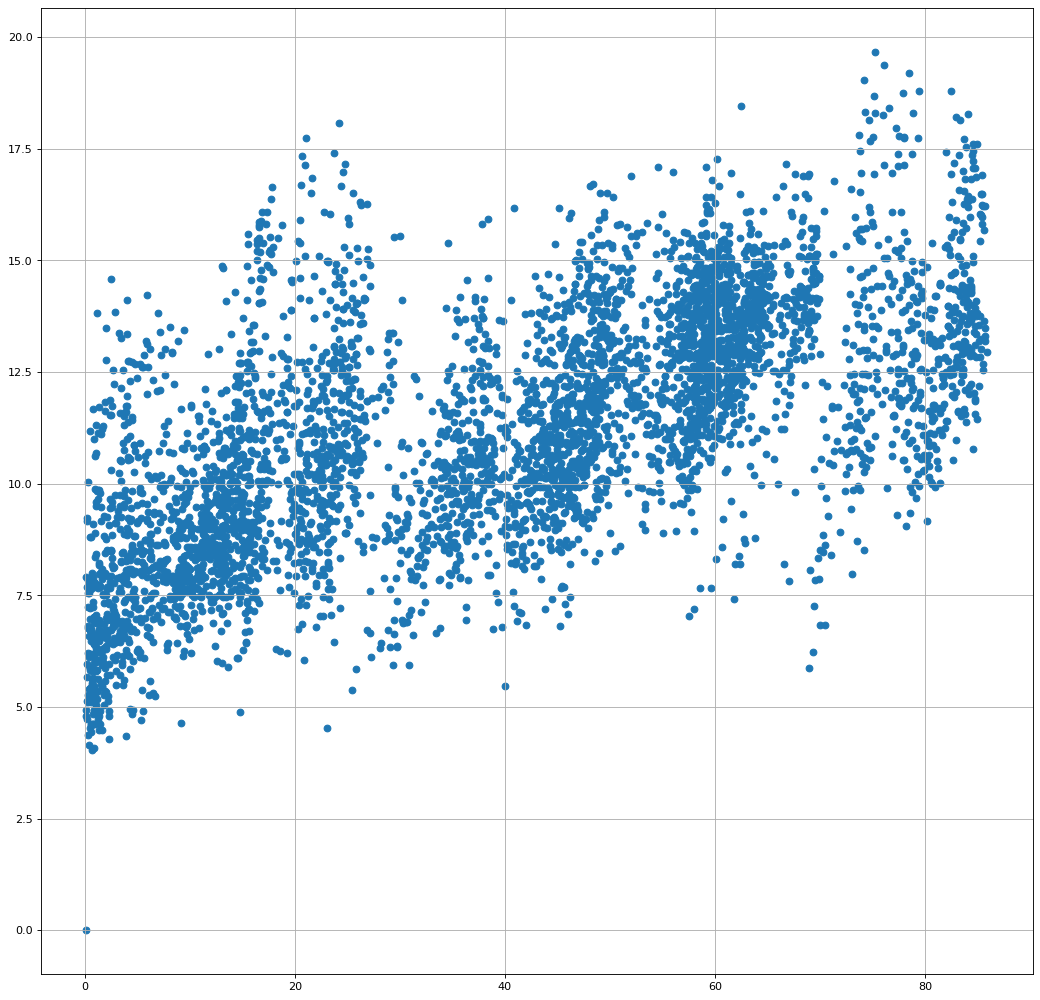

In [142]:
plot_shepard_diagram(dist_mx_trimap_tiny_cos, dist_mx_X_tiny)

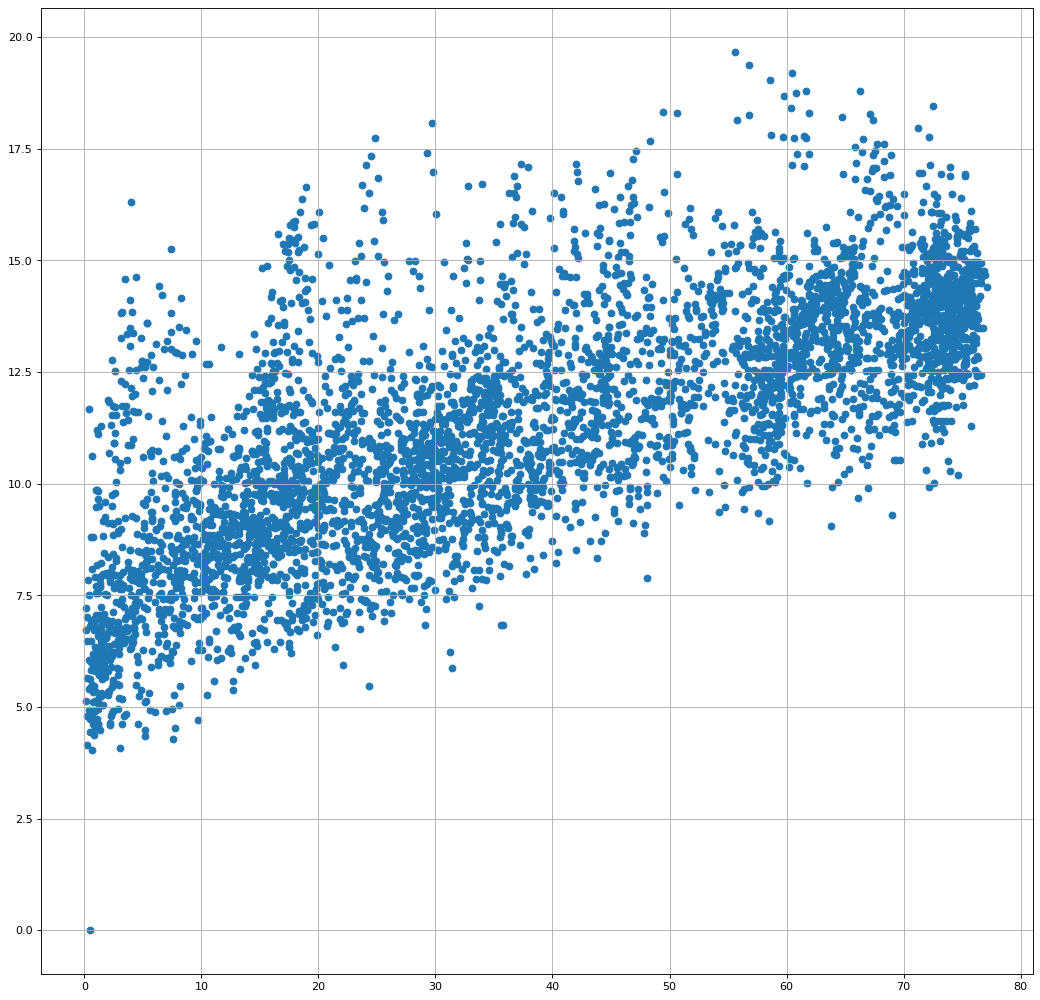

In [143]:
plot_shepard_diagram(dist_mx_trimap_tiny_eucl, dist_mx_X_tiny)

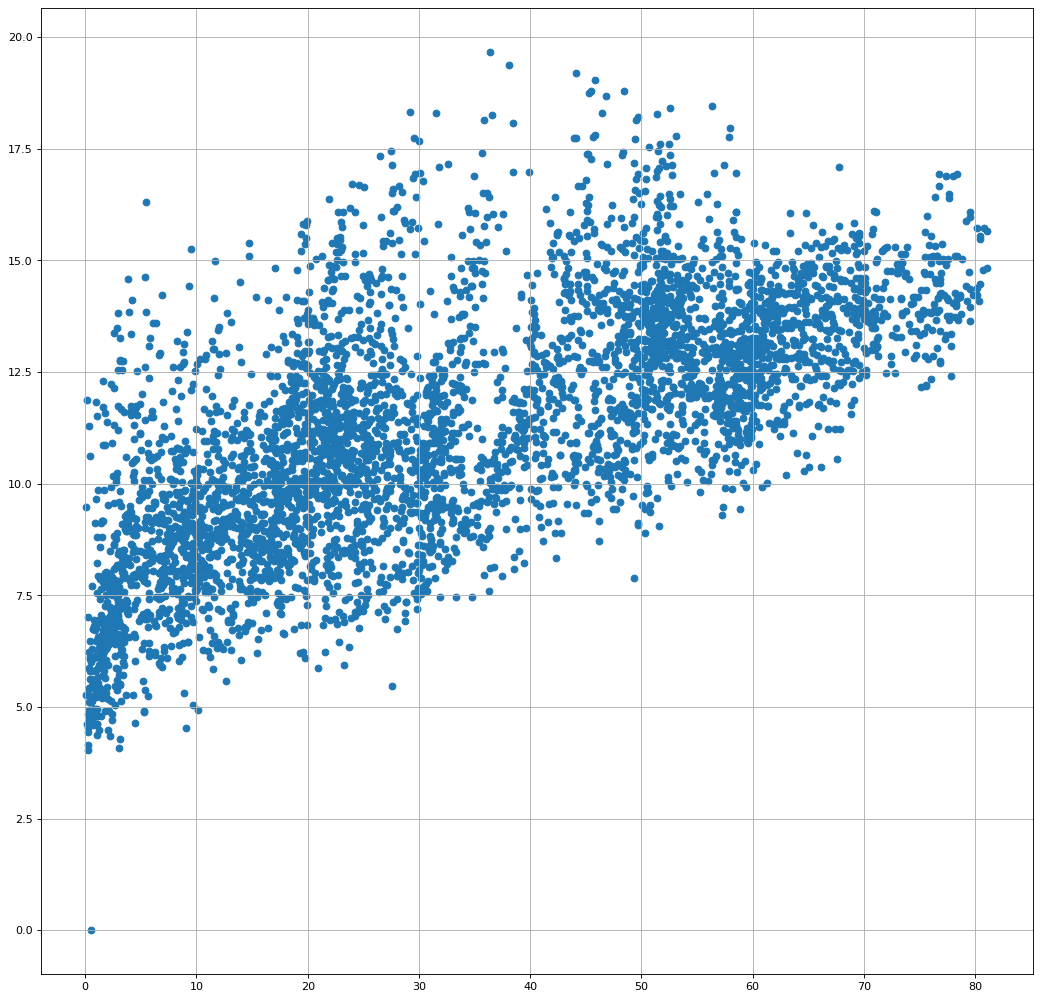

In [144]:
plot_shepard_diagram(dist_mx_trimap_tiny_manh, dist_mx_X_tiny)

Creating _pcoa_ objects

In [ ]:
pcoa_humapl1_tiny = pcoa(dist_mx_humapl1_tiny)

In [ ]:
pcoa_humapl2_tiny = pcoa(dist_mx_humapl2_tiny)

In [ ]:
pcoa_isomap_tiny_cos = pcoa(dist_mx_isomap_tiny_cos)

In [ ]:
pcoa_isomap_tiny_eucl = pcoa(dist_mx_isomap_tiny_eucl)

In [ ]:
pcoa_isomap_tiny_mink = pcoa(dist_mx_isomap_tiny_mink)

In [ ]:
pcoa_pacmap_tiny = pcoa(dist_mx_pacmap_tiny)

In [ ]:
pcoa_trimap_tiny_cos = pcoa(dist_mx_trimap_tiny_cos)

In [ ]:
pcoa_trimap_tiny_eucl = pcoa(dist_mx_trimap_tiny_eucl)

In [ ]:
pcoa_trimap_tiny_manh = pcoa(dist_mx_trimap_tiny_manh)

In [32]:
pcoa_umap_tiny = pcoa(dist_mx_umap_tiny)

Calculating _shepard_

In [ ]:
pcoa_humapl1_tiny.shepard(1,2)

In [ ]:
pcoa_humapl2_tiny.shepard(1,2)

In [ ]:
pcoa_isomap_tiny_cos.shepard(1,2)

In [ ]:
pcoa_isomap_tiny_eucl.shepard(1,2)

In [ ]:
pcoa_isomap_tiny_mink.shepard(1,2)

In [ ]:
pcoa_pacmap_tiny.shepard(1,2)

In [ ]:
pcoa_trimap_tiny_cos.shepard(1,2)

In [ ]:
pcoa_trimap_tiny_eucl.shepard(1,2)

In [ ]:
pcoa_trimap_tiny_manh.shepard(1,2)

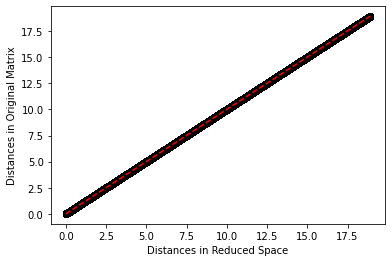

In [33]:
pcoa_umap_tiny.shepard(1,2)